In [1]:
# Neural Network

import pandas as pd
df = pd.read_csv('data/bc.csv', delimiter=',')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


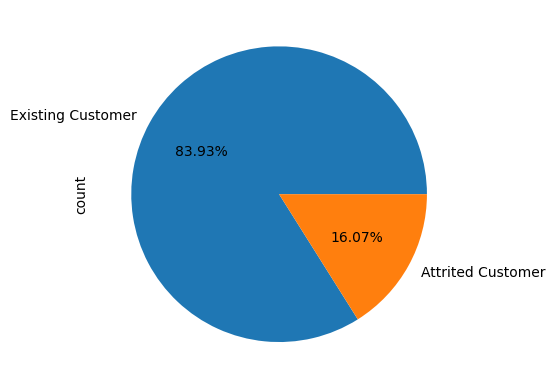

In [2]:
 import matplotlib.pyplot as plt
data = df['Attrition_Flag'].value_counts()
data.plot(kind='pie',autopct='%.2f%%')
plt.show()

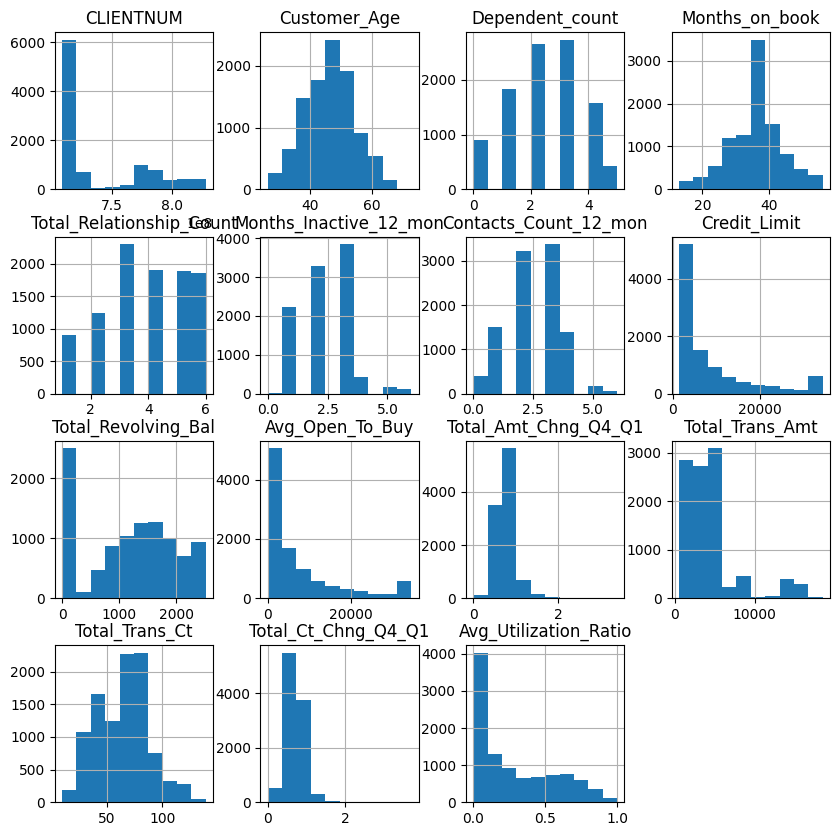

In [3]:
df.hist(figsize=(10,10))
plt.show()

In [4]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [5]:
df_X = df.drop(['CLIENTNUM', 'Attrition_Flag'],axis=1)
df_y = df[['Attrition_Flag']]
cats = df_X.select_dtypes(include=['object', 'bool']).columns
print(cats)

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')


In [8]:
# mlp for classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neural_network import MLPClassifier
# get X and y
df_X = df.drop(['CLIENTNUM', 'Attrition_Flag'],axis=1)
df_y = df[['Attrition_Flag']]
#label encoding for y.
#merubah nilai yg ada di y menjadi 0 atau 1.
#sebenarnya ini tidak diperlukan karena nilai y di dataset sudah 0 atau 1
le = LabelEncoder()
df_y= le.fit_transform(df_y['Attrition_Flag'])
#categorical encoding
#merubah categorical value menjadi numerical value
#bisa pakai label encoding, ordinal atau one hot encoding
cats = df_X.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
le = LabelEncoder()
for i in cat_features:
    le.fit(df_X[i])
    df_X[i] = le.transform(df_X[i])
#menyimpan X dan y menjadi numpy arrays
X = df_X.astype(float).values
y = df_y.astype(float)
#hold-out method, dibagi menjadi training dan testing set. 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#scaling
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#mulai learning
model=MLPClassifier(max_iter=500)
#model=MLPClassifier(max_iter=1000, random_state=42, activation='logistic')
model.fit(X_train, y_train)

/home/aliif/Documents/kuliah/semester6/belajar-pandas/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=500)

In [9]:
model.coefs_

[array([[ 0.14068956,  0.41868809, -0.62741993, ..., -0.41545032,
          0.05441497, -0.47084096],
        [-1.24623152, -0.15722099,  0.01621409, ..., -0.03831527,
         -0.62088812, -0.30159316],
        [-0.03120677,  0.08888939, -0.08159663, ..., -0.17037883,
          0.79923944, -0.04217316],
        ...,
        [ 0.7664578 ,  0.24773158,  0.21469361, ...,  0.76845086,
         -0.2274153 ,  0.58455743],
        [-0.10341774, -0.0725013 , -0.20377371, ...,  0.33658963,
         -0.2709443 , -0.61236124],
        [ 0.1416384 , -0.55202428,  0.06362902, ..., -0.75616924,
          0.33395808,  0.35604318]]),
 array([[ 1.5349819 ],
        [-1.02493646],
        [-1.55253789],
        [ 2.14192073],
        [ 1.98117197],
        [ 0.54522596],
        [-0.67553505],
        [ 3.35522247],
        [-1.23888983],
        [-3.29931905],
        [-1.3593792 ],
        [-0.60476749],
        [ 1.27961144],
        [ 1.32495921],
        [ 0.81507972],
        [-2.66704989],
     

In [10]:
df_X

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,1,2,2,2,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,1,2,6,0,1,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,0,1,3,1,4,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,1,2,2,3,1,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [11]:
X_train[0]

array([ 0.33519339,  1.05692234, -0.25437357,  0.4990858 , -0.61710507,
       -0.56580813, -0.25591165,  0.25586758, -0.51407227, -0.33752656,
       -2.22835505, -0.05917368,  0.98686487, -0.14826286, -0.57038549,
       -0.90317904, -1.65490765, -1.12681489, -0.11093226])

Accuracy  0.9374794340243501
Precision  0.9551257253384913
Recall  0.9709005112072355
Confusion matrix  [[ 380  116]
 [  74 2469]]


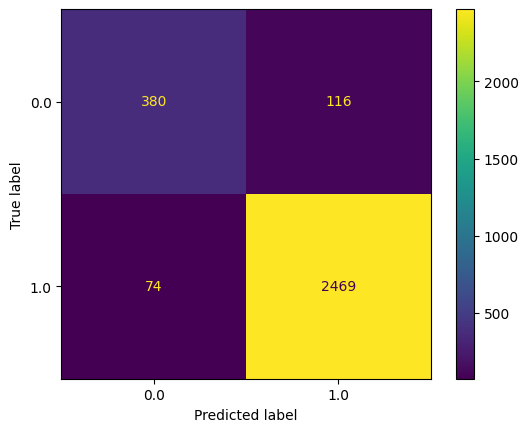

In [12]:
y_pred = model.predict(X_test)
print('Accuracy ',accuracy_score(y_test, y_pred))
print('Precision ',precision_score(y_test, y_pred))
print('Recall ',recall_score(y_test, y_pred))
print('Confusion matrix ', confusion_matrix(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=model.classes_)
disp.plot()
plt.show()

In [13]:
# Make prediction for the new data (Style biasa dan tidak memakai Pipeline)
data = [{'Customer_Age':68, 'Gender':'F', 'Dependent_count':5, 'Education_Level':'Graduate',
 'Marital_Status':'Single', 'Income_Category':'Less than $40K', 'Card_Category':'Blue',
 'Months_on_book':44, 'Total_Relationship_Count':6, 'Months_Inactive_12_mon':1,
 'Contacts_Count_12_mon':2, 'Credit_Limit':8700,'Total_Revolving_Bal':800, 'Avg_Open_To_Buy':7392,
 'Total_Amt_Chng_Q4_Q1':1.541,'Total_Trans_Amt':1200,'Total_Trans_Ct':33,'Total_Ct_Chng_Q4_Q1':3.714,
 'Avg_Utilization_Ratio':0.10},
 {'Customer_Age':50, 'Gender':'M', 'Dependent_count':2, 'Education_Level':'Graduate',
 'Marital_Status':'Single', 'Income_Category':'$40K - $60K', 'Card_Category':'Blue',
 'Months_on_book':38, 'Total_Relationship_Count':3, 'Months_Inactive_12_mon':2,
 'Contacts_Count_12_mon':0, 'Credit_Limit':8077.0,'Total_Revolving_Bal':1965, 'Avg_Open_To_Buy':6112.0,
 'Total_Amt_Chng_Q4_Q1':0.637,'Total_Trans_Amt':1329,'Total_Trans_Ct':26,'Total_Ct_Chng_Q4_Q1':0.444,
 'Avg_Utilization_Ratio':0.243}]

df_input = pd.DataFrame(data)
#categorical encoding
df_X = df.drop(['CLIENTNUM', 'Attrition_Flag'],axis=1)
cats = df_X.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
for i in cat_features:
    le.fit(df_input[i])
    df_input[i] = le.transform(df_input[i])
#scaling
df_input= scaler.transform(df_input.astype(float).values)
result= model.predict(df_input)
for i in result:
    int_result = int(i)
    if (int_result == 0):
        decision = 'Existing Customer'
    elif (int_result==1):
        decision = 'Attrited Customer'
    else:
        decison = 'Not defined'
    print('Result prediction is ', decision)

Result prediction is  Attrited Customer
Result prediction is  Attrited Customer


In [14]:
df_input

array([[ 2.69329634e+00, -9.46143311e-01,  2.08111844e+00,
        -1.68389487e+00, -1.97846227e+00, -1.23078045e+00,
        -2.55911655e-01,  1.00082113e+00,  1.41213614e+00,
        -1.32245379e+00, -4.09541072e-01,  9.83216719e-03,
        -4.44011649e-01, -6.39776613e-03,  3.62111505e+00,
        -9.40555602e-01, -1.35950899e+00,  1.26325766e+01,
        -6.32215193e-01],
       [ 4.59304076e-01,  1.05692234e+00, -2.54373565e-01,
        -1.68389487e+00, -1.97846227e+00, -1.89575277e+00,
        -2.55911655e-01,  2.55867580e-01, -5.14072268e-01,
        -3.37526559e-01, -2.22835505e+00, -5.91736804e-02,
         9.86864872e-01, -1.48262862e-01, -5.70385493e-01,
        -9.03179036e-01, -1.65490765e+00, -1.12681489e+00,
        -1.10932261e-01]])

In [15]:
cat_features

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [ ]:
# MLP for regression